In [81]:
"""
Read and plot correlation heatmap 
"""
import os
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import itertools
import time
from tqdm import tqdm
import sympy as sp
x = sp.var('x')
from sympy import Symbol
from sympy.solvers import solve
import kaleido
from scipy.integrate import odeint
import matplotlib.pyplot as plt

adaptive_folder='C:/Users/jimmy/OneDrive/Desktop/Maestria Metodos Matematicos y Aplicaciones/Tesis/adaptive'

In [40]:
heatmap_data = pd.read_csv(f"{adaptive_folder}/data/bifurcation_heatmap/simulation_11_Nov.csv")
heatmap_data = heatmap_data[['kappa','xi','numbr_roots']]
# heatmap_data

In [41]:
"""
kappa := C^i/C^s
xi := C^z/C^s
"""

czcss = heatmap_data['xi'].unique().tolist()
czcss.sort()
n=len(czcss)

cicss = heatmap_data['kappa'].unique().tolist()
cicss.sort()
m=len(cicss)

print(m,n)

arr = np.zeros((n,m))
for i in range(n):
    for j in range(m):
        try:
            grid_data_coord = heatmap_data[ (heatmap_data['xi']==czcss[i]) & (heatmap_data['kappa']==cicss[j]) ]
            arr[i,j] = grid_data_coord['numbr_roots'].tolist()[0]
        except Exception as e:
            print(e)
            continue

30 30


### Bifurcation Heatmap: 

- For each $\left(\frac{C^i}{C^s}, \frac{C^z}{C^i}\right)$ point, we get the maximum number possible of roots of the cubic polynomial at the equilibrium (which uses several values of $R0$).

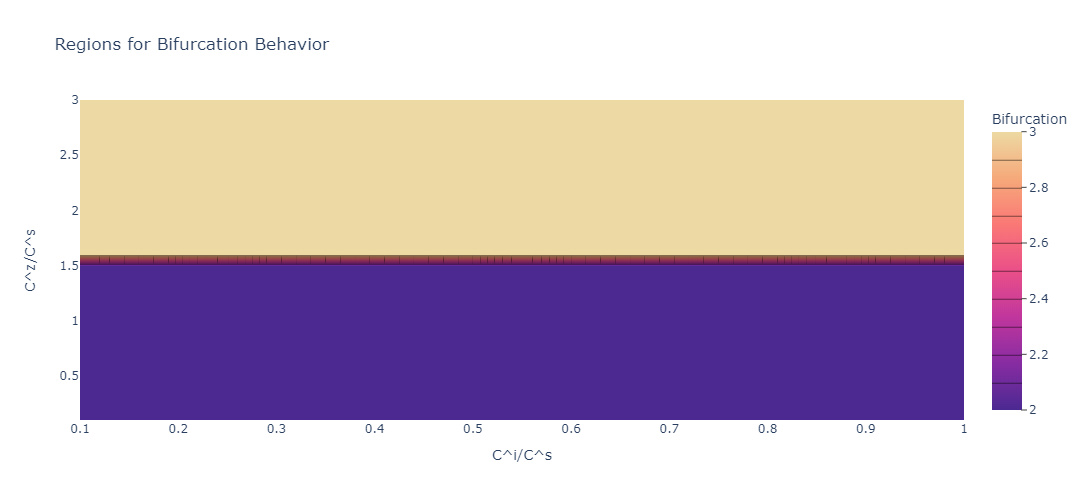

In [42]:
fig = go.Figure()
fig.add_trace(go.Contour(
    z=arr,
    colorscale="Agsunset",
    colorbar=dict(
        title="Bifurcation",
        titleside="top",
        tickmode="array",
        ticktext=["Nothing", "Quadratic", "Cubic"],
        ticks="outside"
    ),
    x=cicss, # horizontal axis
    y=czcss, # vertical axis
    contours_coloring='heatmap'
))
fig.update_layout(width=500,
                  height=500,
                  title="Regions for Bifurcation Behavior",
                  xaxis_title="C^i/C^s",
                  yaxis_title="C^z/C^s"
                 )
fig.show()

Experiments and graphs

In [109]:
### Initial parameters
mu = 0.00015
gamma = 0.0027
beta = 0.009
phi = 0.0044

### R values:
Rmu = mu/(mu+ gamma)
Rphi = phi/(mu + gamma)

print(Rphi)

1.5438596491228072


In [108]:
# Number for three roots condition: (Theorem)
Rphi - (Rmu**2 + 1)/(Rmu**2 - Rmu + 1)

0.4884660631169764

In [107]:
# Compute number of roots using Sturm's Theorem
kappa = 0.8  #C^I/C^S
xi = 1.7 #C^Z/C^S

#R0s = list(np.linspace(0.0001,2,1000))
number_roots = []
R0 = 1.01

coefficients = get_coefficients_cubic(Rphi, Rmu, R0, kappa, xi)
pol = sum([coefficients[i]*x**i for i in range(len(coefficients))])
sturm_seq = sp.sturm(pol) # sturm sequence
print(sturm_seq)

values_at_start = [float(sp.Poly(pol_sturm,x).eval(0)) for pol_sturm in sturm_seq]
values_at_end = [float(sp.Poly(pol_sturm,x).eval(1)) for pol_sturm in sturm_seq]

count_start = len(list(itertools.groupby(values_at_start, lambda values_at_start: values_at_start > 0))) - 1
count_end = len(list(itertools.groupby(values_at_end, lambda values_at_end: values_at_end > 0))) - 1

ans = count_start - count_end
print(f"""
- values_at_start = {values_at_start}
- values_at_end = {values_at_end}
- count_start = {count_start}
- count_end = {count_end}
- number roots = {ans}
""")

roots = solve_polynomial(Rphi, Rmu, R0, kappa, xi)
roots = [root for root in roots if root < 1 and root > 0]
print(roots)

[1.0*x**3 - 0.253434822155201*x**2 + 0.00373708269685218*x - 1.16280208374133e-5, 3.0*x**2 - 0.506869644310403*x + 0.00373708269685218, 0.0117817691089516*x - 9.36060779021438e-5, 0.000100624525030732]

- values_at_start = [-1.1628020837413346e-05, 0.0037370826968521837, -9.360607790214376e-05, 0.00010062452503073211]
- values_at_end = [0.7502906325208133, 2.4968674383864493, 0.011688163031049423, 0.00010062452503073211]
- count_start = 3
- count_end = 0
- number roots = 3

[0.004403945763482652, 0.011097052890317411, 0.23793382350140205]


### Comparison between the theoretical equilibria points and the attained equilibrium-


Parameters:
mu : 0.00015
gamma: 0.0027
beta : 0.009
phi: 0.0044


Multiple roots condition satisfied:
True

Contact rates per group:
Cs = 0.4
Ci = 0.32000000000000006
Cz = 0.68


R0 value: 1.0105263157894737
kappa: 0.8
xi: 1.7

Theoretical Possible Equilibria Roots:
[0.004914312662359203, 0.010455203872732766, 0.23809938298643937]

s at equilibrium
0.22512085500134435
0.22512085500134416
i found at equilibrium
0.2380988541694913
z at equilibrium
0.5367802908291646
0.536780345110825

Value of polynomial at i*: -6.690772998835248e-08
Plot of System:



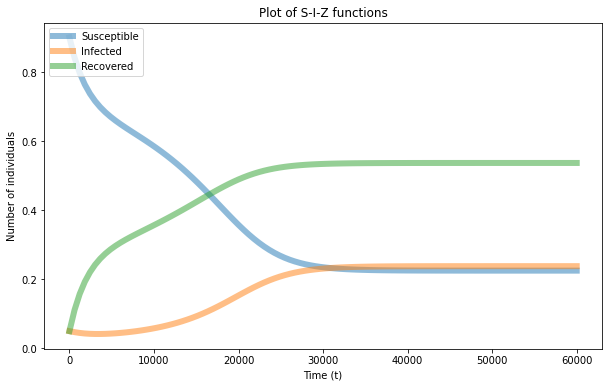

In [106]:
# Initial parameters
mu = 0.00015
gamma = 0.0027
beta = 0.009
phi = 0.0044

# R values:
Rmu = mu/(mu+ gamma)
Rphi = phi/(mu + gamma)

print(f"""
Parameters:
mu : {mu}
gamma: {gamma}
beta : {beta}
phi: {phi}
""")

# Number for three roots condition: (Theorem)
print(f"""
Multiple roots condition satisfied:
{Rphi - (Rmu**2 + 1)/(Rmu**2 - Rmu + 1) > 0}
""")

Cs = 0.4
Ci = Cs*kappa
Cz = Cs*xi

print(f"""Contact rates per group:
Cs = {Cs}
Ci = {Ci}
Cz = {Cz}
""")

R0 = Ci*beta/(gamma+mu)
roots = solve_polynomial(Rphi, Rmu, R0, kappa, xi)

print(f"""
R0 value: {R0}
kappa: {kappa}
xi: {xi}

Theoretical Possible Equilibria Roots:
{roots}
""")

t_max = 60000
steps = 100
x00 = [0.9, 0.05, 0.05]

s,i,z = solve_odes_system(Cs,Ci,Cz)

s_eq = s[len(s)-1]
i_eq = i[len(i)-1]
z_eq = z[len(z)-1]

print("s at equilibrium")
print(s_eq)
print(1 - i_eq - z_eq)

print("i found at equilibrium")
print(i_eq)

print("z at equilibrium")
print(z_eq)
print((gamma*i_eq)/(phi*i_eq + mu))

x_3 = (Rphi**2)*(R0) + Rmu*(Rphi**2)*(kappa -1)
x_2 = Rphi*(R0*(1 - Rphi) + Rmu*(R0 + Rphi))
x_2 = x_2 + Rphi*(Rmu*(1 - Rmu)*(xi - 1) + Rmu*(1 + Rmu)*(kappa - 1)) 
x_1 = Rmu*(R0*(1 - Rphi)  + Rphi*(1 - R0)  + Rmu*Rphi)
x_1 = x_1+ Rmu*((1 - Rmu)*(xi - 1) + Rmu*(kappa - 1))
x_0 = (Rmu**2)*(1 - R0)

poly_theo = x_0 + x_1*i_eq + x_2*(i_eq**2) + x_3*(i_eq**3)

print(f"""
Value of polynomial at i*: {poly_theo}
Plot of System:
""")

t = np.linspace(0, 0 + t_max, steps)
plt.plot(t, s, label="Susceptible",lw=6, alpha=0.5)
plt.plot(t, i, label="Infected",lw=6, alpha=0.5)
plt.plot(t, z, label="Recovered",lw=6, alpha=0.5)
plt.title("Plot of S-I-Z functions")
plt.xlabel("Time (t)")
plt.ylabel("Number of individuals")
plt.legend(loc = "upper left")
plt.rcParams["figure.figsize"] = (10,6)
plt.show()

In [ ]:
# values = [(0.8,1.7), (0.5, 1.7), (0.3, 1.7), (0, 1.7),
#           (0.8,1.2), (0.5, 1.2), (0.3, 1.2), (0, 1.2),
#           (0.8,0.7), (0.5, 0.7), (0.3, 0.7), (0, 0.7),
#           (0.8,0.3), (0.5, 0.3), (0.3, 0.3), (0, 0.3),
#          ]
# figs = []
# for val in values:

#     kappa = val[0]  #C^I/C^S
#     xi = val[1] #C^Z/C^S

#     data_graph = pd.DataFrame({})

#     R0s = list(np.linspace(0.01, 1.1, 1000))
#     vals = []

#     for i in tqdm(range(len(R0s))):

#         R0 = R0s[i]
#         roots = solve_polynomial(Rphi, Rmu, R0, kappa, xi)
#         roots = [root for root in roots if root < 1 and root > 0]

#         for root in roots:
#             data_graph = data_graph.append(pd.DataFrame({
#                 'R0':[R0],
#                 'i_opt':[root]
#             }))
            
#     figs.append({
#         'value': val,
#         'data_graph': data_graph
#     })

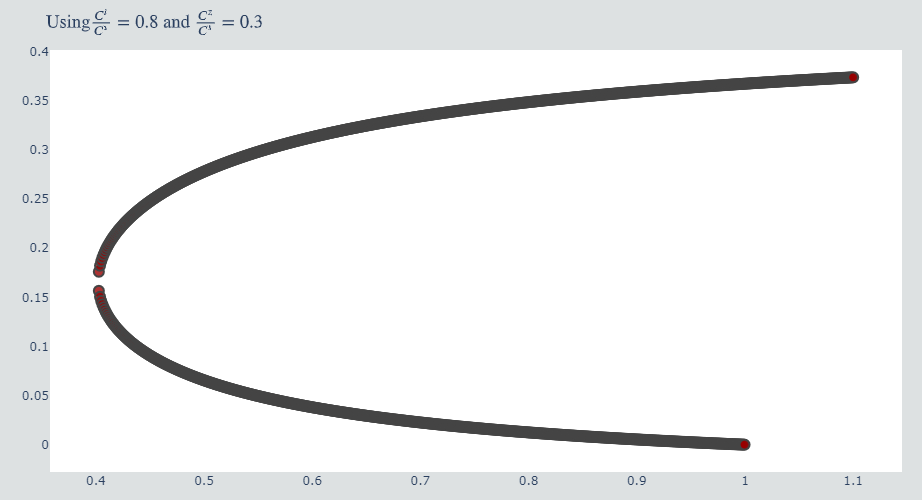

In [111]:
data = figs[12]
kappa = data['value'][0]
xi = data['value'][1]
data_graph = data['data_graph']

fig = go.Figure()

fig.add_trace(go.Scatter(
    x = data_graph['R0'], y = data_graph['i_opt'],
    mode='markers',
    marker_color='rgba(152, 0, 0, .8)'
))

R_0_min = 0.7824
R_0_max = 1.0062

if xi >= 1.55:
    fig.add_vline(x = R_0_min)
    fig.add_vline(x = R_0_max)
    fig.add_vline(x = 1)
    fig.add_vrect(x0 = 1, x1 = R_0_max, line_width = 0, fillcolor = "red", opacity = 0.2)

    fig.add_annotation(
            x=R_0_max,
            y=0.125,
            xref="x",
            yref="y",
            text=f"$$R_0 = 1 + {round(R_0_max - 1,4)}$$",
            showarrow=True,
            font=dict(
                family="Courier New, monospace",
                size=12,
                color="#ffffff"
                ),
            align="center",
            arrowhead=2,
            arrowsize=1,
            arrowwidth=2,
            arrowcolor="#636363",
            ax=20,
            ay=-30,
            bordercolor="#c7c7c7",
            borderwidth=2,
            borderpad=4,
            bgcolor="#ff7f0e",
            opacity=0.8
            )

fig.update_layout(
    paper_bgcolor = '#DDE1E2',
    plot_bgcolor = '#FFFFFF', 
    height = 500,
    width = 600,
    title = f"$\\text{{Using}} \\frac{{C^i}}{{C^s}} = {kappa} \\text{{ and }} \\frac{{C^z}}{{C^s}} = {xi}$",
    margin = dict(
        l = 50,
        r = 20,
        t = 50,
        b = 20
    )
)
fig.update_traces(mode='markers', marker_line_width = 2, marker_size = 10)
fig.write_image(f"fig_{kappa}_{xi}.png",engine = 'kaleido')
fig

### Functions:

- `get_coefficients_cubic`
- `nmbr_rts_interval`
- `evaluate_cubic`
- `solve_polynomial`

In [11]:
def get_coefficients_cubic(Rphi, Rmu, R0, kappa, xi):

    ### Returns the coefficients x3,x2,x1,x0 of the cubic polynomial in the notes.

    """
    kappa := C^i/C^s
    xi := C^z/C^s
    """

    x_3 = (Rphi**2)*(R0) + Rmu*(Rphi**2)*(kappa -1)
    
    x_2 = Rphi*(R0*(1 - Rphi) + Rmu*(R0 + Rphi))
    x_2 = x_2 + Rphi*(Rmu*(1 - Rmu)*(xi - 1) + Rmu*(1 + Rmu)*(kappa - 1)) 

    x_1 = Rmu*(R0*(1 - Rphi)  + Rphi*(1 - R0)  + Rmu*Rphi)
    x_1 = x_1+ Rmu*((1 - Rmu)*(xi - 1) + Rmu*(kappa - 1))

    x_0 = (Rmu**2)*(1 - R0)

    return [x_0,x_1,x_2,x_3]

def nmbr_rts_interval(Rphi, Rmu, val_tuple):

    kappa = val_tuple[0]
    xi = val_tuple[1]
    
    print(f"Processing tuple {(kappa,xi)}.")
    start_tuple = time.time()

    R0s = list(np.linspace(0.0001,2,1000))
    vals = []

    for R0 in tqdm(R0s):

        # Compute number of roots using Sturm's Theorem

        coefficients = get_coefficients_cubic(Rphi, Rmu, R0, kappa, xi)
        pol = sum([coefficients[i]*x**i for i in range(len(coefficients))])
        sturm_seq = sp.sturm(pol) # sturm sequence

        values_at_start = [float(sp.Poly(pol_sturm,x).eval(0)) for pol_sturm in sturm_seq]
        values_at_end = [float(sp.Poly(pol_sturm,x).eval(1)) for pol_sturm in sturm_seq]

        count_start = len(list(itertools.groupby(values_at_start, lambda values_at_start: values_at_start > 0)))
        count_end = len(list(itertools.groupby(values_at_end, lambda values_at_end: values_at_end > 0)))

        ans = count_start - count_end
        vals.append(ans)

    answer = max(vals)
    return answer

def evaluate_cubic(i, Rphi, Rmu, R0, kappa, xi):
    [x_0,x_1,x_2,x_3] = get_coefficients_cubic(Rphi, Rmu, R0, kappa, xi)
    return x_3*(i**3) + x_2*(i**2) + x_1*i + x_0

def solve_polynomial(Rphi, Rmu, R0, kappa, xi):
    
    x = Symbol('x')
    resp = solve(evaluate_cubic(x, Rphi, Rmu, R0, kappa, xi), x)
    resp = [(float(expr.as_real_imag()[0]), float(expr.as_real_imag()[1]) ) for expr in resp]
    resp = [expr[0] for expr in resp if expr[0]>0 and abs(expr[1])<1e-15]
    
    return resp

def get_constants(Rphi, Rmu):
    const_dict = {}
    const_dict['A'] = Rphi**2 
    const_dict['B'] = Rmu*(Rphi**2)
    const_dict['C'] = Rphi*(Rmu**2)
    const_dict['D'] = Rphi*(1-Rphi) + Rphi*Rmu
    const_dict['E'] = Rphi*Rmu*(1+Rmu)
    const_dict['F'] = Rphi*Rmu*(1-Rmu)
    const_dict['G'] = Rphi*Rmu*(1+Rmu)
    const_dict['H'] = Rmu*(1-Rphi) - Rmu*Rphi
    const_dict['I'] = Rmu**2
    const_dict['J'] = Rmu*(1-Rmu)
    const_dict['K'] = Rmu**2
    
    coefficients = {
        'x_3' : f"{const_dict['A']}x-{const_dict['B']}(1-k)",
        'x_2' : f"{const_dict['C']} + {const_dict['D']}x - {const_dict['E']}(1-k) - {const_dict['F']}(1-y)",
        'x_1' : f"{const_dict['G']} + {const_dict['H']}x - {const_dict['I']}(1-k) - {const_dict['J']}(1-y)",
        'x_0' : f"{const_dict['K']}(1-x)",
    }
    
    return coefficients

Functions to solve a system of differential equations.

In [88]:
def state_odes_system(x, t, Cs, Ci, Cz):

    s = x[0]
    i = x[1]
    z = x[2]

    # C function 
    C = Cs*Ci/(s*Cs + i*Ci + z*Cz)

    # System 
    dsdt = -C*beta*s*i + mu - mu*s
    didt = C*beta*s*i + phi*z*i - (gamma + mu)*i  
    dzdt = gamma*i - phi*z*i - mu*z

    return [dsdt, didt, dzdt]

def solve_odes_system(Cs,Ci,Cz):

    """
    Solve the classical system with initial conditions
    """

    t = np.linspace(0, 0 + t_max, steps)
    x = odeint(state_odes_system, x00, t, args= (Cs,Ci,Cz))

    s = x[:,0]
    i = x[:,1]
    z = x[:,2]

    return s, i, z